In [1]:
#https://github.com/pascal1129/kaggle_airbus_ship_detection/blob/master/1_detectron_infer/infer_airbus.py#

from collections import defaultdict
import argparse
import cv2 
import glob
import logging
import os
import sys
import time

import torch, torchvision

print(torch.__version__, torch.cuda.is_available())

import pycocotools.mask as mask_util
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from detectron2.config import get_cfg

import detectron2.utils.comm as comm
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

1.6.0 True


In [2]:
def create_test_datatset():    
    
    img_dir = 'input/test_v2/'
    dataset_dicts = []
    
    for img_path in glob.glob(img_dir + '*.jpg'):
        record = {}
        file_path = img_path
        image_id = img_path.split('/')[-1].split('.')[0]
        record['file_name'] = file_path
        record['image_id'] = image_id
        dataset_dicts.append(record)
    return dataset_dicts

test_dataset = create_test_datatset()
img_ids = []
pred_string = []

DatasetCatalog.register("submit_test1", create_test_datatset)
od_dataset = MetadataCatalog.get("submit_test1")

In [3]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

cfg.DATASETS.TEST = ("submit_test1", )
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
# THE ULTRA MOST IMPORTANT FKING things https://detectron2.readthedocs.io/modules/config.html
# https://medium.com/@hirotoschwert/digging-into-detectron-2-part-5-6e220d762f9
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.0
predictor = DefaultPredictor(cfg)

{'file_name': 'input/test_v2/00002bd58.jpg', 'image_id': '00002bd58'}


/opt/conda/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  filter_inds = filter_mask.nonzero()


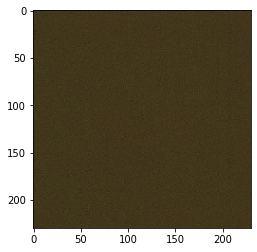

{'file_name': 'input/test_v2/00015efb6.jpg', 'image_id': '00015efb6'}


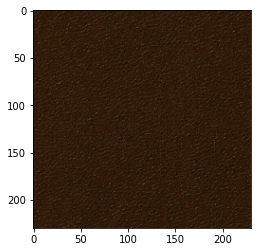

{'file_name': 'input/test_v2/00023d5fc.jpg', 'image_id': '00023d5fc'}


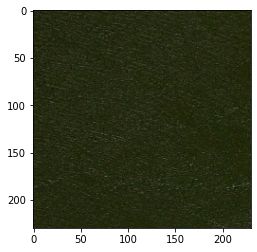

{'file_name': 'input/test_v2/000367c13.jpg', 'image_id': '000367c13'}


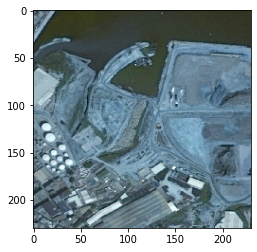

{'file_name': 'input/test_v2/0008ca6e9.jpg', 'image_id': '0008ca6e9'}


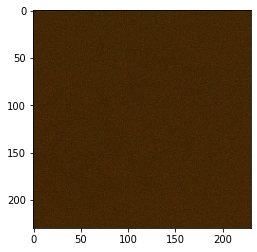

{'file_name': 'input/test_v2/000a4635f.jpg', 'image_id': '000a4635f'}


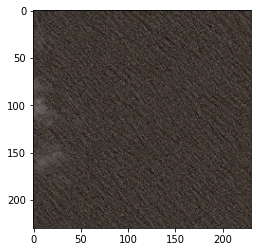

{'file_name': 'input/test_v2/000bd9dbf.jpg', 'image_id': '000bd9dbf'}


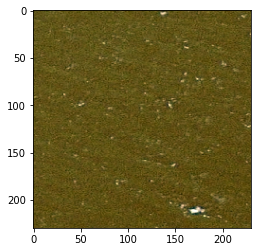

{'file_name': 'input/test_v2/000f7d875.jpg', 'image_id': '000f7d875'}


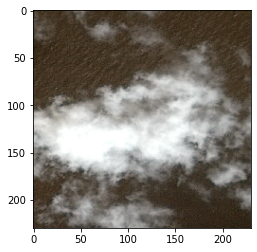

{'file_name': 'input/test_v2/0010551d9.jpg', 'image_id': '0010551d9'}


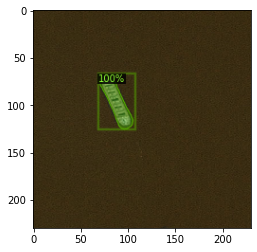

{'file_name': 'input/test_v2/001839c6f.jpg', 'image_id': '001839c6f'}


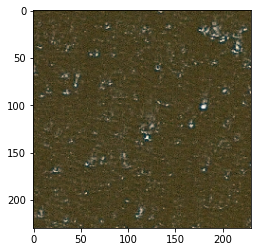

{'file_name': 'input/test_v2/002a943bf.jpg', 'image_id': '002a943bf'}


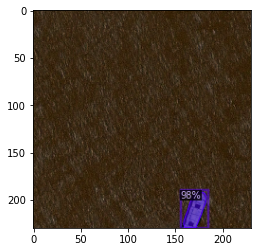

{'file_name': 'input/test_v2/00313b166.jpg', 'image_id': '00313b166'}


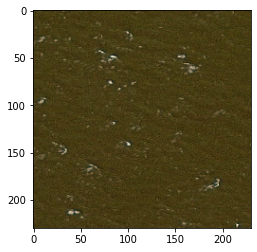

{'file_name': 'input/test_v2/00327b02d.jpg', 'image_id': '00327b02d'}


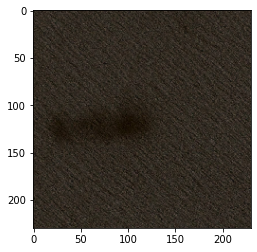

{'file_name': 'input/test_v2/0035268d9.jpg', 'image_id': '0035268d9'}


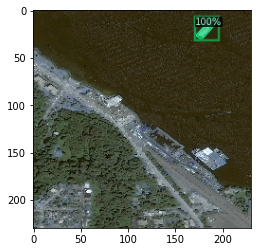

{'file_name': 'input/test_v2/003b58a76.jpg', 'image_id': '003b58a76'}


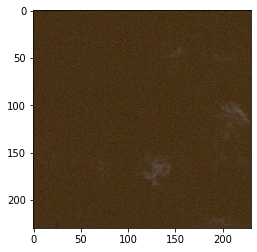

{'file_name': 'input/test_v2/0044e3dda.jpg', 'image_id': '0044e3dda'}


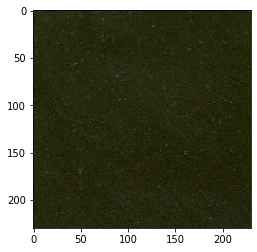

{'file_name': 'input/test_v2/0046967a4.jpg', 'image_id': '0046967a4'}


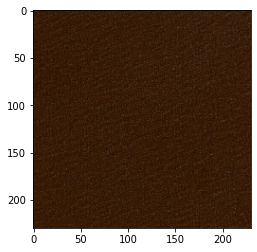

{'file_name': 'input/test_v2/004751507.jpg', 'image_id': '004751507'}


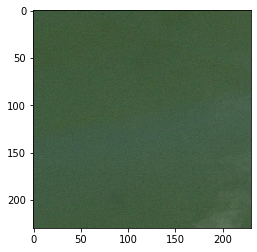

{'file_name': 'input/test_v2/0047c79fc.jpg', 'image_id': '0047c79fc'}


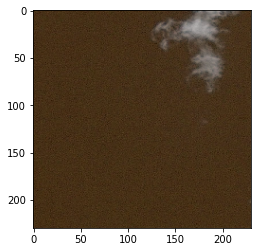

{'file_name': 'input/test_v2/004946ceb.jpg', 'image_id': '004946ceb'}


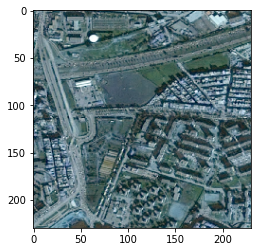

{'file_name': 'input/test_v2/004dd347a.jpg', 'image_id': '004dd347a'}


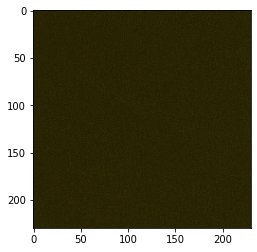

{'file_name': 'input/test_v2/00506a19e.jpg', 'image_id': '00506a19e'}


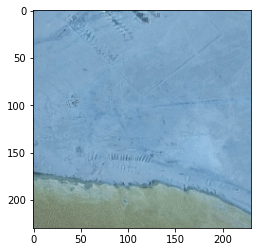

{'file_name': 'input/test_v2/0057c059b.jpg', 'image_id': '0057c059b'}


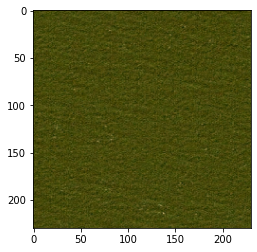

{'file_name': 'input/test_v2/005b8152d.jpg', 'image_id': '005b8152d'}


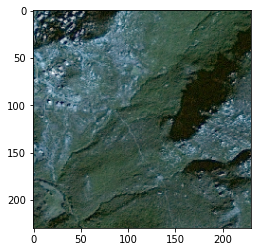

{'file_name': 'input/test_v2/0063cb1e9.jpg', 'image_id': '0063cb1e9'}


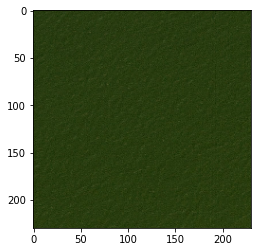

{'file_name': 'input/test_v2/00696ecc2.jpg', 'image_id': '00696ecc2'}


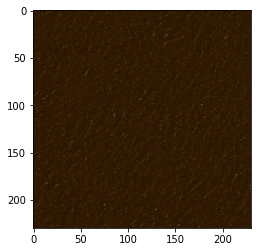

{'file_name': 'input/test_v2/006ba5b3b.jpg', 'image_id': '006ba5b3b'}


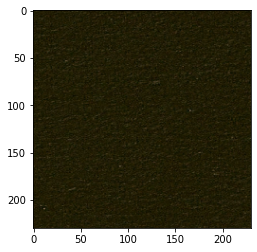

{'file_name': 'input/test_v2/007211988.jpg', 'image_id': '007211988'}


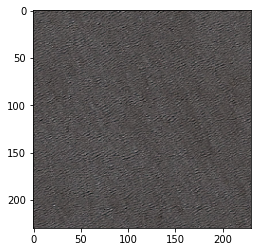

{'file_name': 'input/test_v2/007545acc.jpg', 'image_id': '007545acc'}


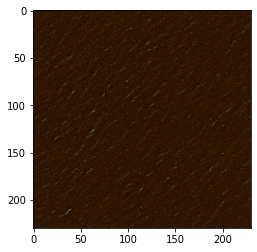

{'file_name': 'input/test_v2/0075cd3f1.jpg', 'image_id': '0075cd3f1'}


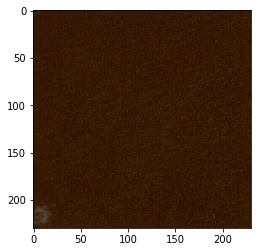

In [4]:
for test_data in test_dataset[0:30]:
    print(test_data)
    image_id = test_data['file_name'].split('/')[-1].split('.')[0]
    img = plt.imread(test_data['file_name'])
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1], metadata=od_dataset, scale=0.3,)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu") )
    plt.figure()
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

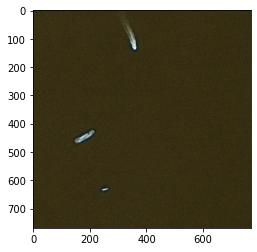

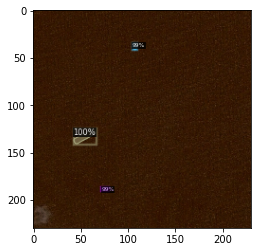

In [5]:
inputs = cv2.imread("input/test_v2/00a3ab3cc.jpg")
plt.imshow(inputs)
outputs = predictor(inputs)
v = Visualizer(img[:, :, ::-1], metadata=od_dataset, scale=0.3,)
v = v.draw_instance_predictions(outputs["instances"].to("cpu") )
plt.figure()
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
print(outputs["instances"])

Instances(num_instances=3, image_height=768, image_width=768, fields=[pred_boxes: Boxes(tensor([[141.7010, 416.9051, 223.4141, 474.6694],
        [240.7261, 624.9586, 267.7927, 638.1600],
        [348.7850, 117.8356, 365.1739, 141.6993]], device='cuda:0')), scores: tensor([0.9995, 0.9943, 0.9897], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
 

In [11]:
bboxes = np.round(outputs["instances"].pred_boxes.tensor.cpu().numpy(),0).astype(int)
print(bboxes)

[[138 419 220 479]
 [242 625 267 639]
 [351 116 365 143]]


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
3


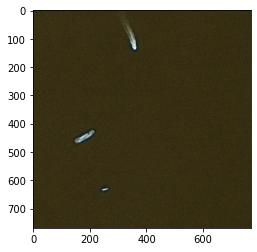

In [12]:
inputs = cv2.imread("input/test_v2/00a3ab3cc.jpg")
plt.imshow(inputs)
outputs = predictor(inputs)
masks = outputs["instances"].pred_masks.cpu().numpy()
print(masks[0])
print(masks.shape[0])

In [8]:
img_ids = []
outputs = []
for i in range(len(test_dataset)): #For some reason it doesn't let for img in test_dataset -.-... appending error.
    
    img_id = test_dataset[i]['file_name'].split('/')[-1]
    img_ids.append(img_id)
    
    inputs = cv2.imread(test_dataset[i]['file_name'])
    output = predictor(inputs) 
    
    outputs.append({ 
        'ImageId':img_id,
        'Output':output
    })
    
    if(i%1000 == 0):
        print(i,len(test_dataset))

0 15606
1000 15606
2000 15606
3000 15606
4000 15606
5000 15606
6000 15606
7000 15606
8000 15606
9000 15606
10000 15606
11000 15606
12000 15606
13000 15606
14000 15606
15000 15606


In [10]:
def rle_encode(img, shape=(768,768)):
    pixels = img.T.flatten()    # T is needed here.
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def extract_result(img_dict):
    
    img_id_x = img_dict['ImageId']
    predictions = img_dict['Output']
    img_mask_x = predictions['instances'].pred_masks.cpu().numpy()
    img_score_x = predictions["instances"].scores.cpu().numpy() 

        
    return img_id_x, None, img_mask_x, img_score_x

def masks_to_rle_csv(img_id, masks, scores): 
    
    index = np.argsort(-scores)          
    bg = np.zeros((768,768), dtype=np.uint8)   
    bg_list = []
    
    for i in index:
        
        mask = masks[i,:,:]
        if(mask is None):
            continue
        mask_xor = (mask^bg)&mask #bg == 0, = 1, 1^1 & mask
        area = mask_xor.sum()
        if(area == 0):
            continue
        bg += mask_xor   #NO OVERLAPS...  
        
        img_ids.append(img_id)
        img_rle.append(rle_encode(mask_xor))
        img_scores.append(scores[i])
        img_areas.append(area)


img_ids = []
img_rle = []
img_scores = []
img_areas = []

for i in range(len(outputs)):
    img_id_xxx, boxes, segms_xxx, img_score_xxx = extract_result(outputs[i])
    
    if segms_xxx is not None and len(segms_xxx) > 0:
        masks_t = np.array(segms_xxx)
        masks_to_rle_csv(img_id_xxx, masks_t, img_score_xxx)
    if(i%1000 == 0):
        print(i,len(outputs))    

0 15606
1000 15606
2000 15606
3000 15606
4000 15606
5000 15606
6000 15606
7000 15606
8000 15606
9000 15606
10000 15606
11000 15606
12000 15606
13000 15606
14000 15606
15000 15606


In [11]:
df = pd.DataFrame({'ImageId':img_ids, 'EncodedPixels':img_rle, 'confidence':img_scores, 'area':img_areas})
df = df[['ImageId', 'EncodedPixels', 'confidence', 'area']]   # change the column index
df.to_csv("rle.csv", index=False, sep=str(','))

In [12]:
dataset_dir = 'input/test_v2/'
csv_origin = 'rle.csv'
csv_submit = 'submit.csv'

def get_im_no_ship(df_with_ship):
    im_all = os.listdir(dataset_dir)
    im_no_ship = list(set(im_all).difference(set(df_with_ship['ImageId'].tolist())))
    return im_no_ship
def get_im_list(df):
    df_with_ship = df[df['EncodedPixels'].notnull()]['ImageId']
    return list(set(df_with_ship))
def get_empty_list(length):
    list_empty = []
    for _ in range(length):
        list_empty.append('')
    return list_empty
def generate_final_csv(df_with_ship):
    print("Detectron2:  %d instances,  %d images"  %(df_with_ship.shape[0], len(get_im_list(df_with_ship))))
    im_no_ship = get_im_no_ship(df_with_ship)
    # write dataframe into .csv file
    df_empty = pd.DataFrame({'ImageId':im_no_ship, 'EncodedPixels':get_empty_list(len(im_no_ship))})
    df_submit = pd.concat([df_with_ship, df_empty], sort=False)
    df_submit.drop(['area','confidence'], axis=1, inplace=True)
    df_submit.to_csv(csv_submit, index=False,sep=str(','))   # str(',') is needed
    print('Generate successfully!')
    
df_submit = pd.read_csv('rle.csv')

print("Detectron2:  %d instances,  %d images"  %(df_submit.shape[0], len(get_im_list(df_submit))))

df_submit = df_submit[ (df_submit['area']>50) & (df_submit['confidence']>=0.85) ]

generate_final_csv(df_submit)

Detectron2:  3732 instances,  2616 images
Detectron2:  3321 instances,  2440 images
Generate successfully!
